In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

import keras
import keras.backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras import models
from matplotlib import cm

Using TensorFlow backend.


In [19]:
model = load_model("models/4.ResNet-Model.h5")
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

activation_10 (Activation)      (None, None, None, 2 0           add_3[0][0]                      
__________________________________________________________________________________________________
res3a_branch2a (Conv2D)         (None, None, None, 1 32896       activation_10[0][0]              
__________________________________________________________________________________________________
bn3a_branch2a (BatchNormalizati (None, None, None, 1 512         res3a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_11 (Activation)      (None, None, None, 1 0           bn3a_branch2a[0][0]              
__________________________________________________________________________________________________
res3a_branch2b (Conv2D)         (None, None, None, 1 147584      activation_11[0][0]              
__________________________________________________________________________________________________
bn3a_branc

__________________________________________________________________________________________________
bn3d_branch2c (BatchNormalizati (None, None, None, 5 2048        res3d_branch2c[0][0]             
__________________________________________________________________________________________________
add_7 (Add)                     (None, None, None, 5 0           bn3d_branch2c[0][0]              
                                                                 activation_19[0][0]              
__________________________________________________________________________________________________
activation_22 (Activation)      (None, None, None, 5 0           add_7[0][0]                      
__________________________________________________________________________________________________
res4a_branch2a (Conv2D)         (None, None, None, 2 131328      activation_22[0][0]              
__________________________________________________________________________________________________
bn4a_branc

__________________________________________________________________________________________________
bn4d_branch2b (BatchNormalizati (None, None, None, 2 1024        res4d_branch2b[0][0]             
__________________________________________________________________________________________________
activation_33 (Activation)      (None, None, None, 2 0           bn4d_branch2b[0][0]              
__________________________________________________________________________________________________
res4d_branch2c (Conv2D)         (None, None, None, 1 263168      activation_33[0][0]              
__________________________________________________________________________________________________
bn4d_branch2c (BatchNormalizati (None, None, None, 1 4096        res4d_branch2c[0][0]             
__________________________________________________________________________________________________
add_11 (Add)                    (None, None, None, 1 0           bn4d_branch2c[0][0]              
          

__________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizati (None, None, None, 5 2048        res5b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_44 (Activation)      (None, None, None, 5 0           bn5b_branch2a[0][0]              
__________________________________________________________________________________________________
res5b_branch2b (Conv2D)         (None, None, None, 5 2359808     activation_44[0][0]              
__________________________________________________________________________________________________
bn5b_branch2b (BatchNormalizati (None, None, None, 5 2048        res5b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_45 (Activation)      (None, None, None, 5 0           bn5b_branch2b[0][0]              
__________

In [20]:
img_path = 'data/validation/BCC/hf_ISIC_0027865.jpg'

# We preprocess the image into a 4D tensor
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


C:\Users\User\Anaconda\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


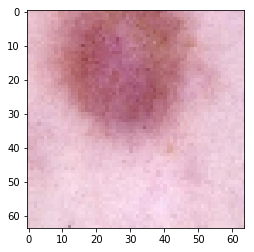

Predicted 0.0


InvalidArgumentError: input_1_3:0 is both fed and fetched.

In [26]:
import numpy as np

from matplotlib import pyplot as plt

from skimage import transform
import math

from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.layers import Activation
from vis.utils import utils

FRAME_H = 64
FRAME_W = 64


img = utils.load_img('df/CenterCrop_hf_ISIC_0025373.jpg')

shape = img.shape
img = img[math.floor(shape[0]/4):, 0:shape[1]] #removed shape[0]-25 from row

target_size=(FRAME_H, FRAME_W)
img = transform.resize(img, target_size, preserve_range=True).astype('uint8')

plt.figure()
plt.subplot()
plt.imshow(img)
plt.show()

# Convert to BGR, create input with batch_size: 1.
bgr_img = utils.bgr2rgb(img)
img_input = np.expand_dims(img_to_array(bgr_img), axis=0)
pred = model.predict(img_input)[0][0]
print('Predicted {}'.format(pred))

for layer in model.layers:
    layer.trainable = True

from vis.visualization import visualize_saliency, overlay

# titles = ['right steering', 'left steering', 'maintain steering']
# modifiers = [None, 'negate', 'small_values']

layer_idx = utils.find_layer_idx(model, 'dense_3')

# Swap softmax with linear
model.layers[layer_idx].activation = Activation('linear')

for i, modifier in enumerate(modifiers):
    heatmap = visualize_saliency(model, layer_idx=-1, filter_indices=0,
                                 seed_input=bgr_img, grad_modifier=modifier)
    plt.figure()
    plt.subplot()
    plt.title(titles[i])
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(img, heatmap, alpha=0.7))
    plt.show()

from vis.visualization import visualize_cam

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0,
                            seed_input=bgr_img, grad_modifier=modifier)
    plt.figure()
    plt.title(titles[i])
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(img, heatmap, alpha=0.7))
    #plt.imshow(overlay(img, heatmap, alpha=0.7))
plt.show()

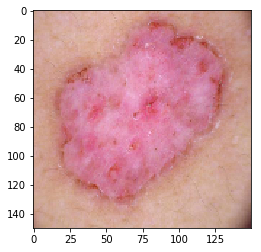

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [6]:
# pip install keras-vis
from vis.utils import utils
from vis.visualization import visualize_cam, visualize_cam_with_losses, visualize_activation, visualize_saliency

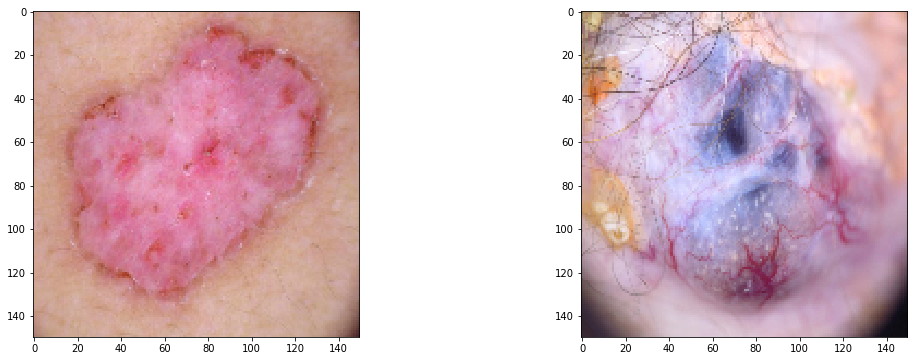

In [7]:
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('data/validation/BCC/hf_ISIC_0027865.jpg', 
                      target_size=(150, 150))
img2 = utils.load_img('data/validation/BCC/ISIC_0025467.jpg', 
                      target_size=(150, 150))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

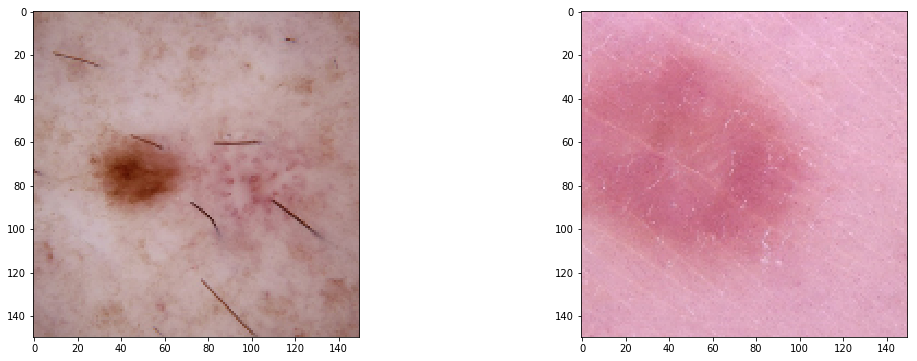

In [8]:
plt.rcParams['figure.figsize'] = (18, 6)

img3 = utils.load_img('data/validation/DF/CenterCrop_ISIC_0025954.jpg', 
                      target_size=(150, 150))
img4 = utils.load_img('data/validation/DF/CenterCrop_RB_ISIC_0029973.jpg', 
                      target_size=(150, 150))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img3)
ax[1].imshow(img4)

In [9]:
import os
import glob
df_dir= "df"
test_images = glob.glob(os.path.join(df_dir, "*.jpg"))
test_images

['df\\CenterCrop_hf_ISIC_0024330.jpg',
 'df\\CenterCrop_hf_ISIC_0025373.jpg',
 'df\\CenterCrop_hf_ISIC_0025980.jpg',
 'df\\CenterCrop_hf_ISIC_0026254.jpg',
 'df\\CenterCrop_hf_ISIC_0026313.jpg',
 'df\\CenterCrop_hf_ISIC_0028880.jpg']

In [10]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
%matplotlib inline


In [11]:
imageSize=224
train_dir = "data2/train/"
validation_dir = 'data2/validation/'
# test_dir =  "data/test/"

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['DF']:
                label = 0
            elif folderName in ['BCC']:
                label = 1
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3), mode='constant')
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir)
X_val, y_val = get_data(validation_dir)
# X_test, y_test= get_data(test_dir)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2) 

from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 2)
y_valHot = to_categorical(y_val, num_classes = 2)
# y_testHot = to_categorical(y_test, num_classes = 2)

100%|██████████| 11/11 [00:00<00:00, 60.93it/s]


In [12]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

In [13]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'input_1': <keras.engine.input_layer.InputLayer at 0x1c923c11470>,
 'conv1_pad': <keras.layers.convolutional.ZeroPadding2D at 0x1c923c114e0>,
 'conv1': <keras.layers.convolutional.Conv2D at 0x1c923c11d68>,
 'bn_conv1': <keras.layers.normalization.BatchNormalization at 0x1c923c11dd8>,
 'activation_1': <keras.layers.core.Activation at 0x1c923c11c50>,
 'pool1_pad': <keras.layers.convolutional.ZeroPadding2D at 0x1c923c11a58>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x1c923c119b0>,
 'res2a_branch2a': <keras.layers.convolutional.Conv2D at 0x1c923c119e8>,
 'bn2a_branch2a': <keras.layers.normalization.BatchNormalization at 0x1c923c11be0>,
 'activation_2': <keras.layers.core.Activation at 0x1c923c11cc0>,
 'res2a_branch2b': <keras.layers.convolutional.Conv2D at 0x1c923c25390>,
 'bn2a_branch2b': <keras.layers.normalization.BatchNormalization at 0x1c923c25320>,
 'activation_3': <keras.layers.core.Activation at 0x1c923c25630>,
 'res2a_branch2c': <keras.layers.convolutional.Conv2D

In [36]:
# idx= 15
# layer_idx = [idx for idx, layer in enumerate(model.layers)][4:11]

In [43]:
# idx= 15
# layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == 'predictions'][-1]
# layer_idx

22

In [48]:
layer_name = "block5_conv3"
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]
layer_idx

17

In [49]:
import numpy as np
from matplotlib import pyplot as plt

from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input

from vis.utils import utils
from vis.visualization import visualize_saliency
# The name of the layer we want to visualize
# (see model definition in vggnet.py)

# idx= 6
# layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == 'predictions'][0]
heatmaps = []
seed_img = X_train[0, :]
x = np.expand_dims(img_to_array(seed_img), axis=0)
x = preprocess_input(x)
x = np.swapaxes(x, 1, 2)
pred_class = np.argmax(model.predict(x))

# Here we are asking it to show attention such that prob of `pred_class` is maximized.
seed_img = np.swapaxes(seed_img, 0, 1)
heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img)
heatmaps.append(heatmap)

plt.axis('off')
plt.imshow(utils.stitch_images(heatmaps))
plt.title('Saliency map')
plt.show()

ValueError: slice index 644 of dimension 3 out of bounds. for 'strided_slice_5' (op: 'StridedSlice') with input shapes: [?,14,14,512], [3], [3], [3] and with computed input tensors: input[1] = <0 0 644>, input[2] = <0 0 645>, input[3] = <1 1 1>.

In [18]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
# model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_3')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
#%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
img = visualize_activation(model, layer_idx, filter_indices=20,verbose=True)
plt.imshow(img)

"""
https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/attention.ipynb
"""
img1 = utils.load_img('df/CenterCrop_hf_ISIC_0025980.jpg', target_size=(224, 224))
img2 = utils.load_img('df/CenterCrop_hf_ISIC_0026254.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

from vis.visualization import visualize_saliency

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_3')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')
    
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=20, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
ax[i].imshow(grads, cmap='jet')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/tmp/xzbc2auo.h5'

In [25]:
for layer in model.layers:
    print(layer.name)

input_1
conv1_pad
conv1
bn_conv1
activation_1
pool1_pad
max_pooling2d_1
res2a_branch2a
bn2a_branch2a
activation_2
res2a_branch2b
bn2a_branch2b
activation_3
res2a_branch2c
res2a_branch1
bn2a_branch2c
bn2a_branch1
add_1
activation_4
res2b_branch2a
bn2b_branch2a
activation_5
res2b_branch2b
bn2b_branch2b
activation_6
res2b_branch2c
bn2b_branch2c
add_2
activation_7
res2c_branch2a
bn2c_branch2a
activation_8
res2c_branch2b
bn2c_branch2b
activation_9
res2c_branch2c
bn2c_branch2c
add_3
activation_10
res3a_branch2a
bn3a_branch2a
activation_11
res3a_branch2b
bn3a_branch2b
activation_12
res3a_branch2c
res3a_branch1
bn3a_branch2c
bn3a_branch1
add_4
activation_13
res3b_branch2a
bn3b_branch2a
activation_14
res3b_branch2b
bn3b_branch2b
activation_15
res3b_branch2c
bn3b_branch2c
add_5
activation_16
res3c_branch2a
bn3c_branch2a
activation_17
res3c_branch2b
bn3c_branch2b
activation_18
res3c_branch2c
bn3c_branch2c
add_6
activation_19
res3d_branch2a
bn3d_branch2a
activation_20
res3d_branch2b
bn3d_branch2b


In [55]:
# model_path = "./models/resnet50_model.h5"
# model = load_model(model_path)
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == "predictions"][0]
label = 107

heatmap = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img)
# heatmap = visualize_activation(model, layer_idx, np.expand_dims(2, axis=0), img)
# heatmap = visualize_cam(model, layer_idx, np.expand_dims(230, axis=0), img)

plt.imshow(heatmap, cmap=plt.cm.jet)
plt.colorbar()
plt.tight_layout()
fig = plt.gcf()
plt.show()

AttributeError: 'Image' object has no attribute 'shape'

In [56]:
import matplotlib as mpl
mpl.use('Agg')

from keras.applications import VGG16
from vis.utils import utils
from keras import activations

from vis.visualization import visualize_saliency, overlay

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('df/CenterCrop_hf_ISIC_0025373.jpg', target_size=(95, 95))
img2 = utils.load_img('df/CenterCrop_hf_ISIC_0026313.jpg', target_size=(95, 95))
"""
f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)
"""

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img)
    
    # visualize grads as heatmap
ax[i].imshow(grads, cmap='jet')

C:\Users\User\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\User\Anaconda\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\User\Anaconda\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\User\Anaconda\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\User\Anaconda\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
 

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/tmp/47tu9_1j.h5'

In [26]:
idx= 5
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=x_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/tmp/l9n9intg.h5'

In [27]:
idx= 3
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == 'predictions'][0]

In [ ]:
layer_outputs = [layer.output for layer in model.layers[2:91]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 45], cmap='gray')
plt.show()

In [ ]:
layer_names = []
for layer in model.layers[:25]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
   
    
    plt.title(layer_name)
    plt.grid(False)
    
    plt.imshow(display_grid, aspect='auto', cmap=cm.bone)
    plt.savefig('plots/bonecmap_validation_bcc_hf_ISIC_0027865_activation_' + layer_name +'.png', bbox_inches='tight', dpi = 100)
plt.show()

In [ ]:
model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [ ]:
# The call to `gradients` returns a list of tensors (of size 1 in this case)
# hence we only keep the first element -- which is a tensor.
grads = K.gradients(loss, model.input)[0]

In [ ]:
# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [ ]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [ ]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [ ]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results/255)
    plt.show()

In [ ]:
for layer_name in ['block1_conv2', 'block2_conv2', 'block3_conv2', 'block4_conv2']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results/255)
    plt.show()

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:64]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    
plt.show()